In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Exploration

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
aus=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv")
ind=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv")
usa=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv")

In [4]:
print(aus.shape)
print(ind.shape)
print(usa.shape)

(512, 27)
(907, 27)
(11879, 27)


In [5]:
# Cheking whether all 3 datasets have same column names 

columns_aus = set(aus.columns)
columns_ind = set(ind.columns)
columns_usa = set(usa.columns)

# Checking if column names are the same
if columns_aus == columns_ind == columns_usa:
    print("Column names are the same across all three datasets.")
else:
    print("Column names are not the same across all three datasets.")

# Printing out the column names 
print("Columns in Australia dataset:", columns_aus)
print("Columns in India dataset:", columns_ind)
print("Columns in USA dataset:", columns_usa)

Column names are the same across all three datasets.
Columns in Australia dataset: {'other_fuel1', 'source', 'year_of_capacity_data', 'wepp_id', 'country', 'generation_data_source', 'url', 'gppd_idnr', 'geolocation_source', 'latitude', 'generation_gwh_2018', 'generation_gwh_2016', 'generation_gwh_2019', 'generation_gwh_2013', 'capacity_mw', 'generation_gwh_2017', 'primary_fuel', 'name', 'country_long', 'longitude', 'other_fuel2', 'owner', 'generation_gwh_2015', 'commissioning_year', 'other_fuel3', 'generation_gwh_2014', 'estimated_generation_gwh'}
Columns in India dataset: {'other_fuel1', 'source', 'year_of_capacity_data', 'wepp_id', 'country', 'generation_data_source', 'url', 'gppd_idnr', 'geolocation_source', 'latitude', 'generation_gwh_2018', 'generation_gwh_2016', 'generation_gwh_2019', 'generation_gwh_2013', 'capacity_mw', 'generation_gwh_2017', 'primary_fuel', 'name', 'country_long', 'longitude', 'other_fuel2', 'owner', 'generation_gwh_2015', 'commissioning_year', 'other_fuel3', 

#### Now, we can say that our datasets have different number of rows but same number of columns with same names.

In [6]:
# Combining all 3 datasets in single dataframe 
df=pd.concat([aus, ind, usa], ignore_index=True)

In [7]:
df.shape

(13298, 27)

After combining all the datasets we have 13298 rows and 27 columns.

In [8]:
df.sample(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
8439,USA,United States of America,NIST Solar,USA0062208,4.0,39.1270,-77.2160,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,0.000,6.321,U.S. Energy Information Administration,NaN
2761,USA,United States of America,Brooke Solar,USA0060140,0.0,36.2443,-78.3772,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9736,USA,United States of America,Preston (MN),USA0002004,3.7,43.6661,-92.0831,Gas,Oil,NaN,...,2019.0,0.058,0.091,0.045,0.165,0.09,0.085,0.12,U.S. Energy Information Administration,NaN


In [9]:
# Checking for missing values
missing_values = df.isnull().sum()

# Calculating percentage of missing values
percentage_missing = (missing_values / len(df)) * 100

# Combining it into a DataFrame for better readability
missing_data = pd.DataFrame({
    'Missing_Values': missing_values,
    'Percentage_Missing': percentage_missing
})

# Displaying columns with missing values and their percentages
print("Columns with missing values:")
print(missing_data[missing_data['Missing_Values'] > 0])

Columns with missing values:
                          Missing_Values  Percentage_Missing
capacity_mw                            6            0.045120
latitude                              78            0.586554
longitude                             78            0.586554
primary_fuel                        2004           15.069935
other_fuel1                        11670           87.757558
other_fuel2                        13028           97.969619
other_fuel3                        13206           99.308167
commissioning_year                  2644           19.882689
owner                                593            4.459317
geolocation_source                    23            0.172958
wepp_id                            13298          100.000000
year_of_capacity_data                438            3.293728
generation_gwh_2013                 6128           46.082118
generation_gwh_2014                 5764           43.344864
generation_gwh_2015                 5305           39.89

Many columns has a lot of missing values, we will have to drop them later.

In [10]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [11]:
df.nunique()

country                         3
country_long                    3
name                        13266
gppd_idnr                   13298
capacity_mw                  2304
latitude                    12385
longitude                   12733
primary_fuel                   14
other_fuel1                    12
other_fuel2                    11
other_fuel3                     9
commissioning_year           1936
owner                        5877
source                        206
url                           325
geolocation_source              5
wepp_id                         0
year_of_capacity_data           1
generation_gwh_2013          5616
generation_gwh_2014          6306
generation_gwh_2015          6692
generation_gwh_2016          7150
generation_gwh_2017          7630
generation_gwh_2018          8040
generation_gwh_2019          8368
generation_data_source          3
estimated_generation_gwh        0
dtype: int64

## Data Preprocessing

#### Handling Missing Values

In [12]:
# Dropping columns with more than 70% missing values
threshold = 70
columns_to_drop = missing_data[missing_data['Percentage_Missing'] > threshold].index
df = df.drop(columns=columns_to_drop)

# Printing the list of dropped columns
print("Dropped columns:")
print(columns_to_drop)

Dropped columns:
Index(['other_fuel1', 'other_fuel2', 'other_fuel3', 'wepp_id',
       'estimated_generation_gwh'],
      dtype='object')


In [13]:
df.shape

(13298, 22)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  object 
 1   country_long            13298 non-null  object 
 2   name                    13298 non-null  object 
 3   gppd_idnr               13298 non-null  object 
 4   capacity_mw             13292 non-null  float64
 5   latitude                13220 non-null  float64
 6   longitude               13220 non-null  float64
 7   primary_fuel            11294 non-null  object 
 8   commissioning_year      10654 non-null  float64
 9   owner                   12705 non-null  object 
 10  source                  13298 non-null  object 
 11  url                     13298 non-null  object 
 12  geolocation_source      13275 non-null  object 
 13  year_of_capacity_data   12860 non-null  float64
 14  generation_gwh_2013     7170 non-null 

In [15]:
# Handling missing values in numeric columns (float64)
numeric_columns = df.select_dtypes(include='float64').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Handling missing values in object columns (object)
object_columns = df.select_dtypes(include='object').columns
df[object_columns] = df[object_columns].fillna(df[object_columns].mode().iloc[0])

# Verifying no more missing values
print(df.isnull().sum())

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64


We have successfully handled all the missing values

In [16]:
df.sample(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
6252,USA,United States of America,Hope Solar Farm LLC,USA0063371,2.00,42.7264,-73.6021,Solar,2020.000000,Green Street Power Partners,...,U.S. Energy Information Administration,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,0.0,U.S. Energy Information Administration
103,AUS,Australia,Colongra,AUS0000271,724.00,-33.2099,151.5448,Gas,2017.000000,Delta Electricity,...,Australian Renewable Energy Mapping Infrastruc...,2019.0,19.173056,13.840556,71.796389,28.942222,14.008333,15.121111,0.0,Australia Clean Energy Regulator
692,IND,India,DNYANESHWAR MILL,WRI1019952,12.96,19.4496,75.0382,Biomass,1998.184904,Shri Ssk ltd,...,WRI,2019.0,0.000000,635.739731,616.801877,561.784508,532.472482,513.679016,0.0,U.S. Energy Information Administration


In [17]:
# Checking number of unique values in categorical columns

# Selecting object type columns (categorical columns)
categorical_columns = df.select_dtypes(include='object').columns

# Printing number of unique values in each categorical column
for col in categorical_columns:
    unique_values_count = df[col].nunique()
    print(f"Column '{col}' has {unique_values_count} unique values.")

Column 'country' has 3 unique values.
Column 'country_long' has 3 unique values.
Column 'name' has 13266 unique values.
Column 'gppd_idnr' has 13298 unique values.
Column 'primary_fuel' has 14 unique values.
Column 'owner' has 5877 unique values.
Column 'source' has 206 unique values.
Column 'url' has 325 unique values.
Column 'geolocation_source' has 5 unique values.
Column 'generation_gwh_2019' has 8368 unique values.
Column 'generation_data_source' has 3 unique values.


In [18]:
len(categorical_columns)

11

In [19]:
# Dropping Irrelevant columns
drop_list=['country_long','name','gppd_idnr','url']
df.drop(drop_list,axis=1,inplace=True)

In [20]:
df.sample(3)

,country,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
12076,USA,200.1,43.4296,-92.8395,Wind,2019.000000,Turtle Creek Wind Farm LLC,U.S. Energy Information Administration,U.S. Energy Information Administration,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,18.247000,597.668,U.S. Energy Information Administration
10706,USA,0.0,29.8461,-96.1973,Solar,1998.184904,Castleman Power Development LLC,U.S. Energy Information Administration,U.S. Energy Information Administration,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,0.0,U.S. Energy Information Administration
2296,USA,0.0,38.1122,-80.6131,Solar,1998.184904,Invenergy Services LLC,U.S. Energy Information Administration,U.S. Energy Information Administration,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,0.0,U.S. Energy Information Administration


In [21]:
# Converting generation_gwh_2019 datatype to numerical 
df['generation_gwh_2019'] = pd.to_numeric(df['generation_gwh_2019'], errors='coerce')

# Checking if the conversion was successful
print(df.dtypes)
print(df['generation_gwh_2019'])

country                    object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_gwh_2019       float64
generation_data_source     object
dtype: object
0         0.00000
1         0.00000
2         0.00000
3         0.00000
4         0.00000
           ...   
13293     1.21100
13294     1.58900
13295     0.00000
13296     0.00000
13297    72.06506
Name: generation_gwh_2019, Length: 13298, dtype: float64


Mission Successfull

## Data Visualization

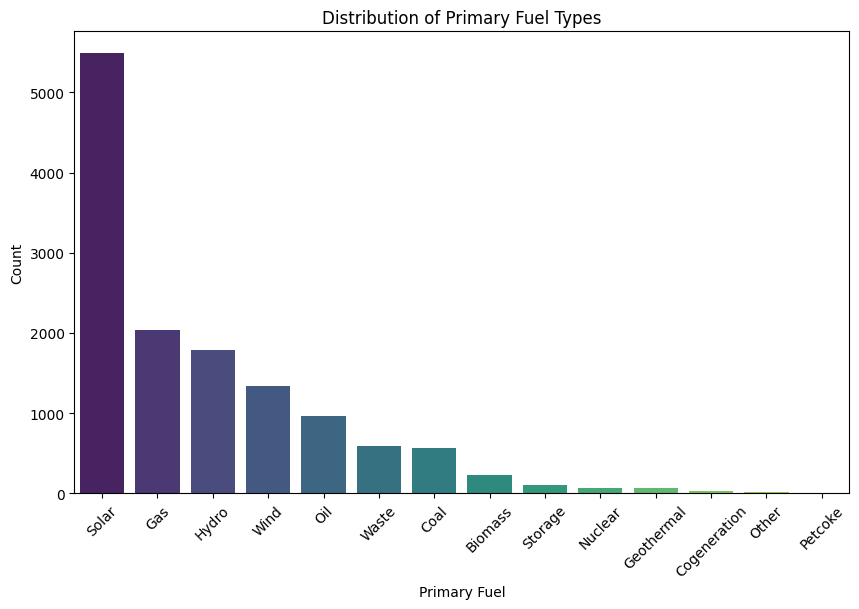

In [22]:
# Plotting the distribution of primary fuel types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='primary_fuel', order=df['primary_fuel'].value_counts().index,palette="viridis")
plt.title('Distribution of Primary Fuel Types')
plt.xlabel('Primary Fuel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

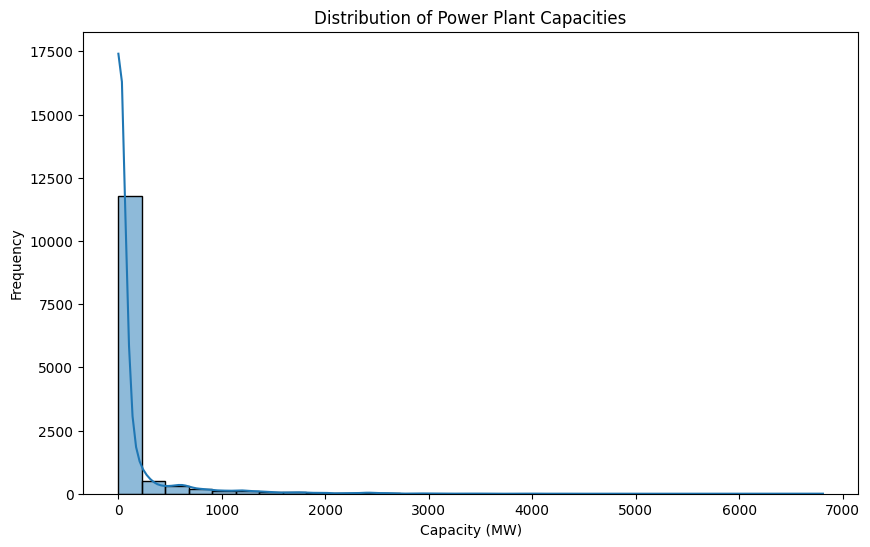

In [23]:
# Power Plant Capacity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['capacity_mw'], bins=30, kde=True, palette="viridis")
plt.title('Distribution of Power Plant Capacities')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.show()

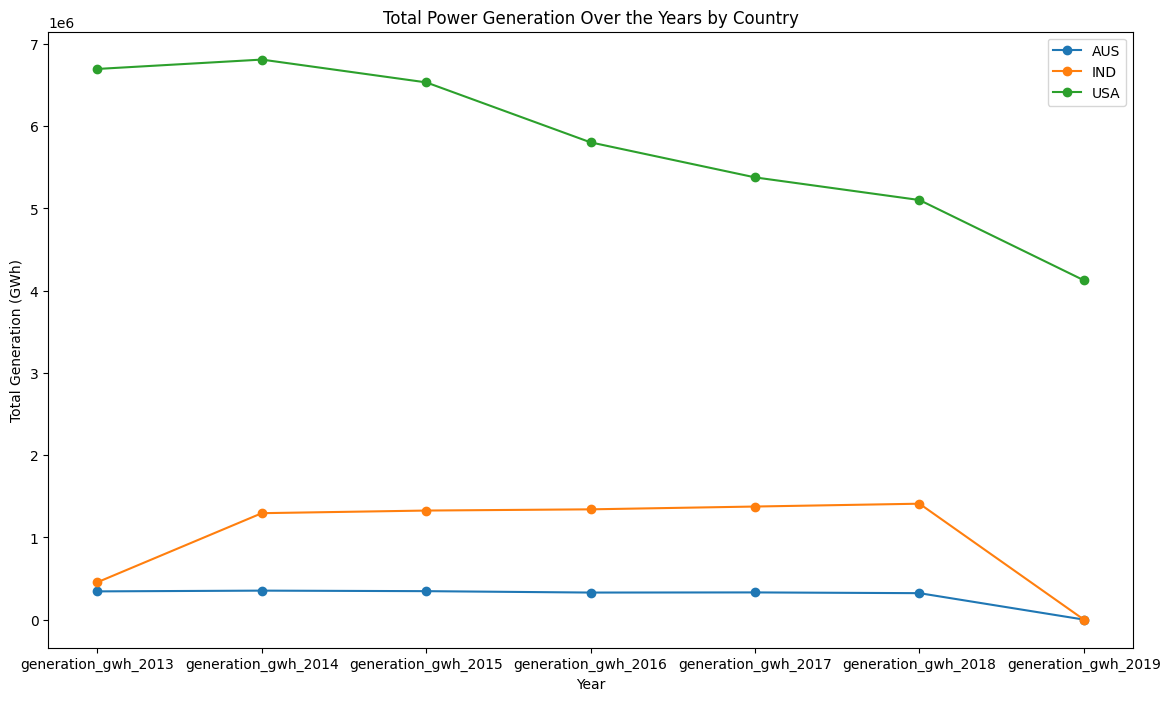

In [24]:
# Summarizing generation data
generation_columns = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019']
df_generation = df.groupby('country')[generation_columns].sum().transpose()

# Plotting the data
plt.figure(figsize=(14, 8))
for country in df_generation.columns:
    plt.plot(df_generation.index, df_generation[country], marker='o', label=country)

plt.title('Total Power Generation Over the Years by Country')
plt.xlabel('Year')
plt.ylabel('Total Generation (GWh)')
plt.legend()
plt.show()

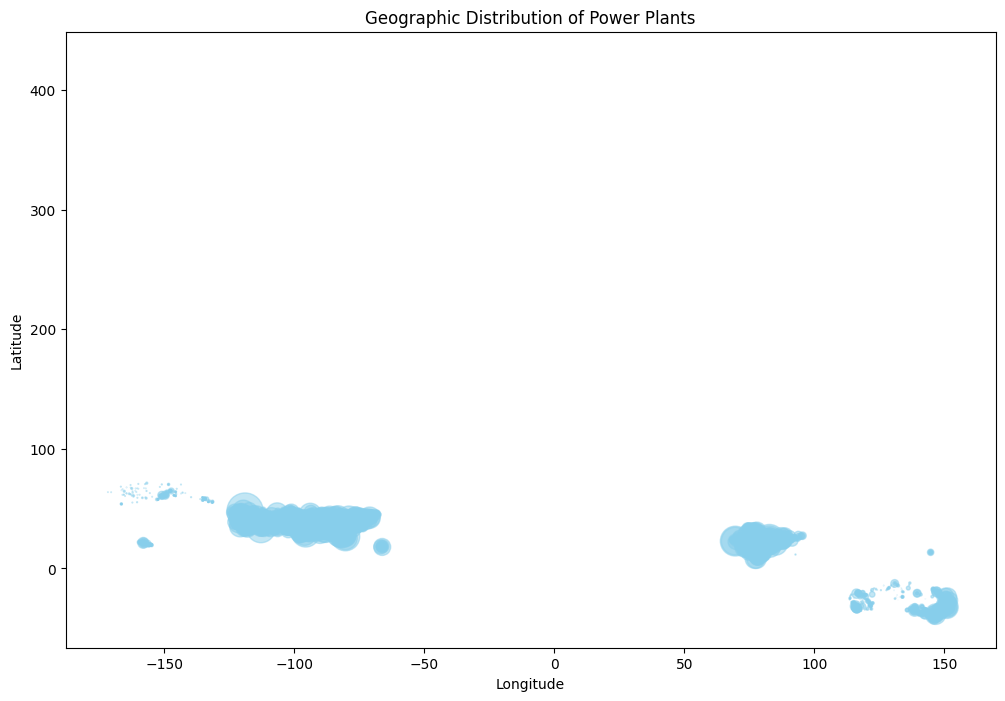

In [25]:
# Geographic distribution of power plants 
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c='skyblue', alpha=0.5, s=df['capacity_mw'] / 10)
plt.title('Geographic Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

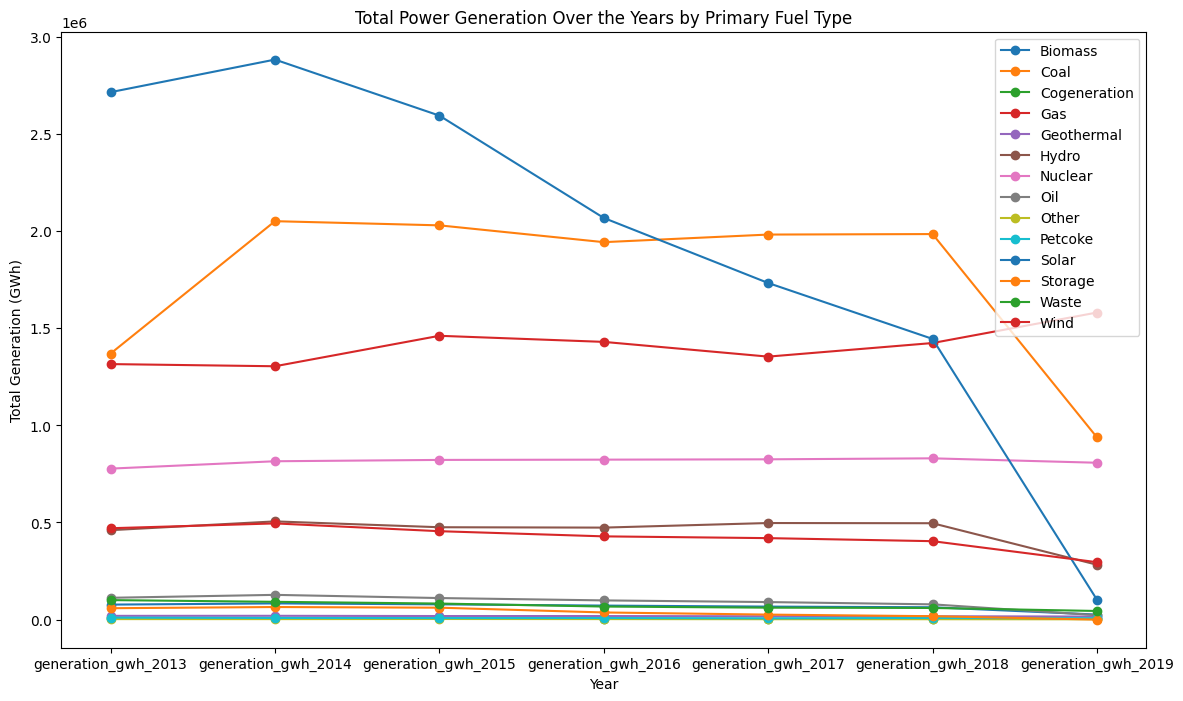

In [26]:
# Summarizing generation data by primary fuel
df_fuel_generation = df.groupby('primary_fuel')[generation_columns].sum().transpose()

# Plotting the data
plt.figure(figsize=(14, 8))
for fuel in df_fuel_generation.columns:
    plt.plot(df_fuel_generation.index, df_fuel_generation[fuel], marker='o', label=fuel)

plt.title('Total Power Generation Over the Years by Primary Fuel Type')
plt.xlabel('Year')
plt.ylabel('Total Generation (GWh)')
plt.legend()
plt.show()

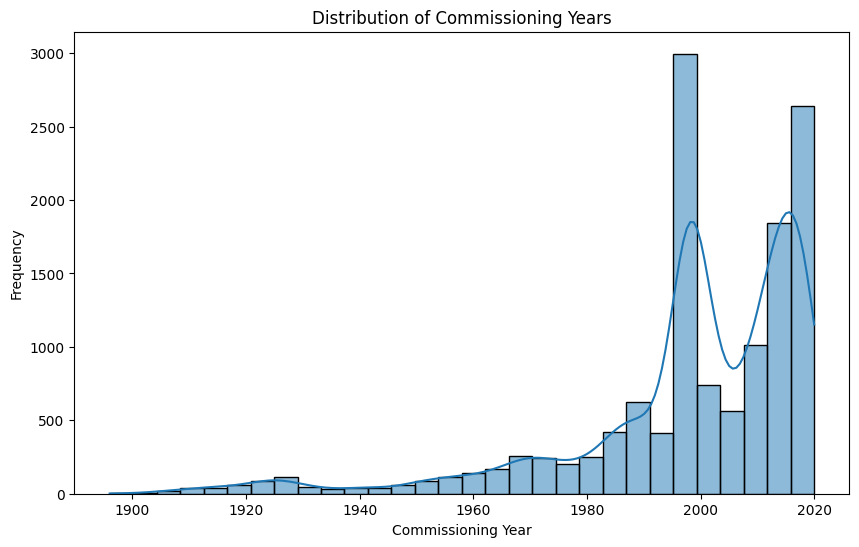

In [27]:
# Distribution of Commissioning years
plt.figure(figsize=(10, 6))
sns.histplot(df['commissioning_year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Commissioning Years')
plt.xlabel('Commissioning Year')
plt.ylabel('Frequency')
plt.show()

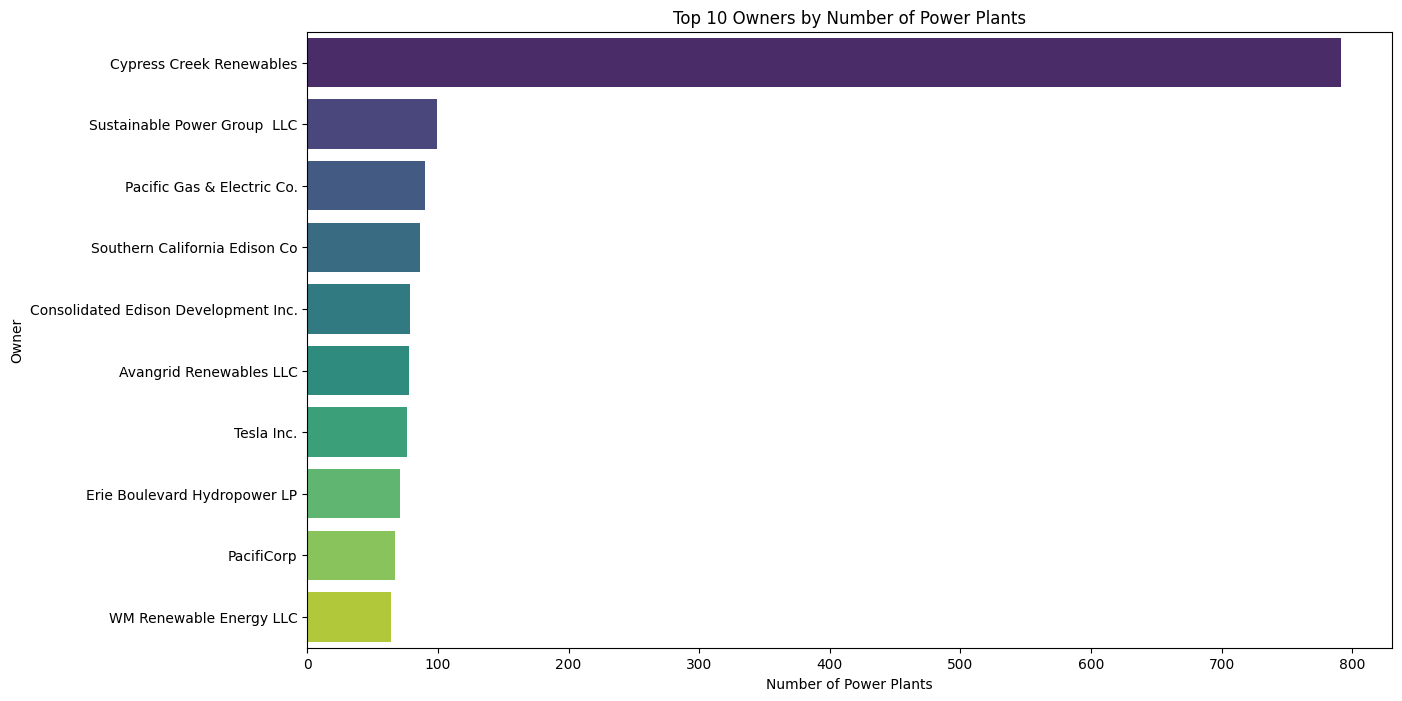

In [28]:
# Count of power plant based on owner
plt.figure(figsize=(14, 8))
top_owners = df['owner'].value_counts().head(10)
sns.barplot(x=top_owners.values, y=top_owners.index, palette="viridis")
plt.title('Top 10 Owners by Number of Power Plants')
plt.xlabel('Number of Power Plants')
plt.ylabel('Owner')
plt.show()

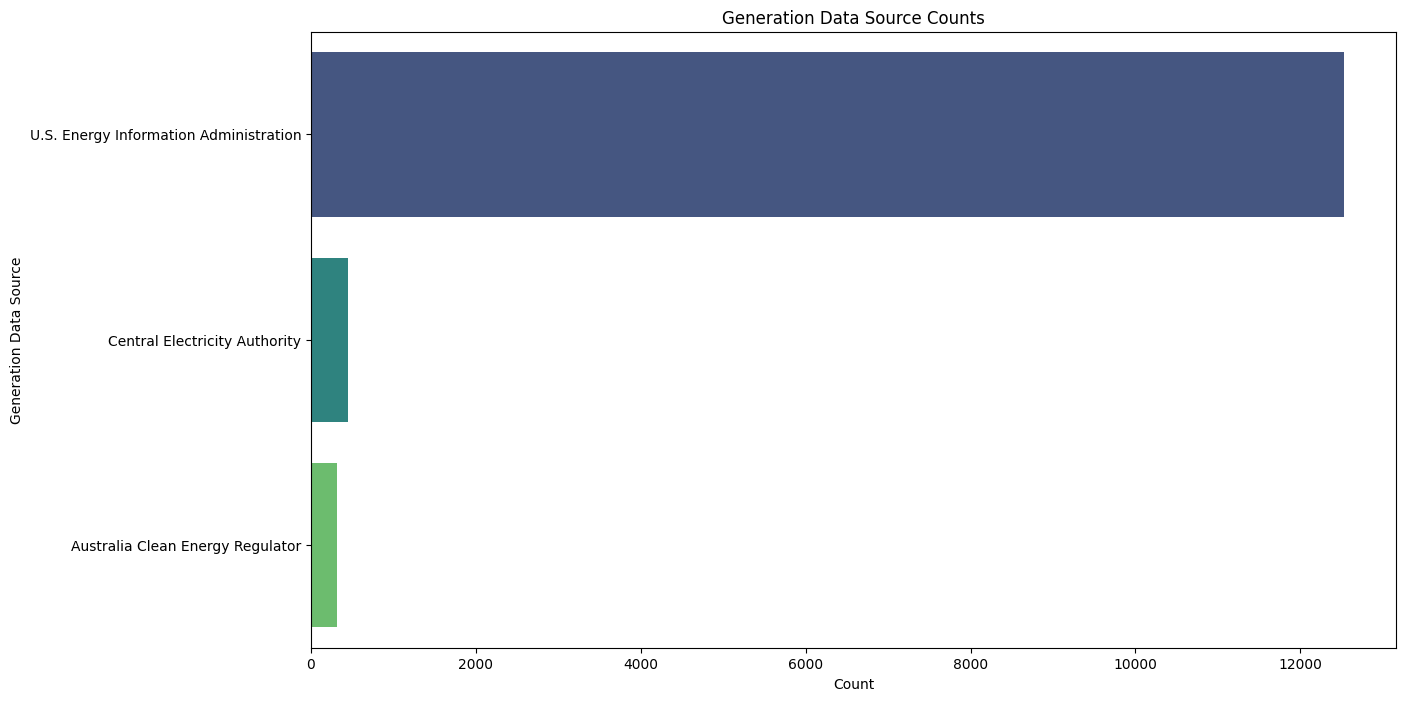

In [29]:
# Generation Data Source
plt.figure(figsize=(14, 8))
generation_data_source_counts = df['generation_data_source'].value_counts()
sns.barplot(x=generation_data_source_counts.values, y=generation_data_source_counts.index,palette="viridis")
plt.title('Generation Data Source Counts')
plt.xlabel('Count')
plt.ylabel('Generation Data Source')
plt.show()

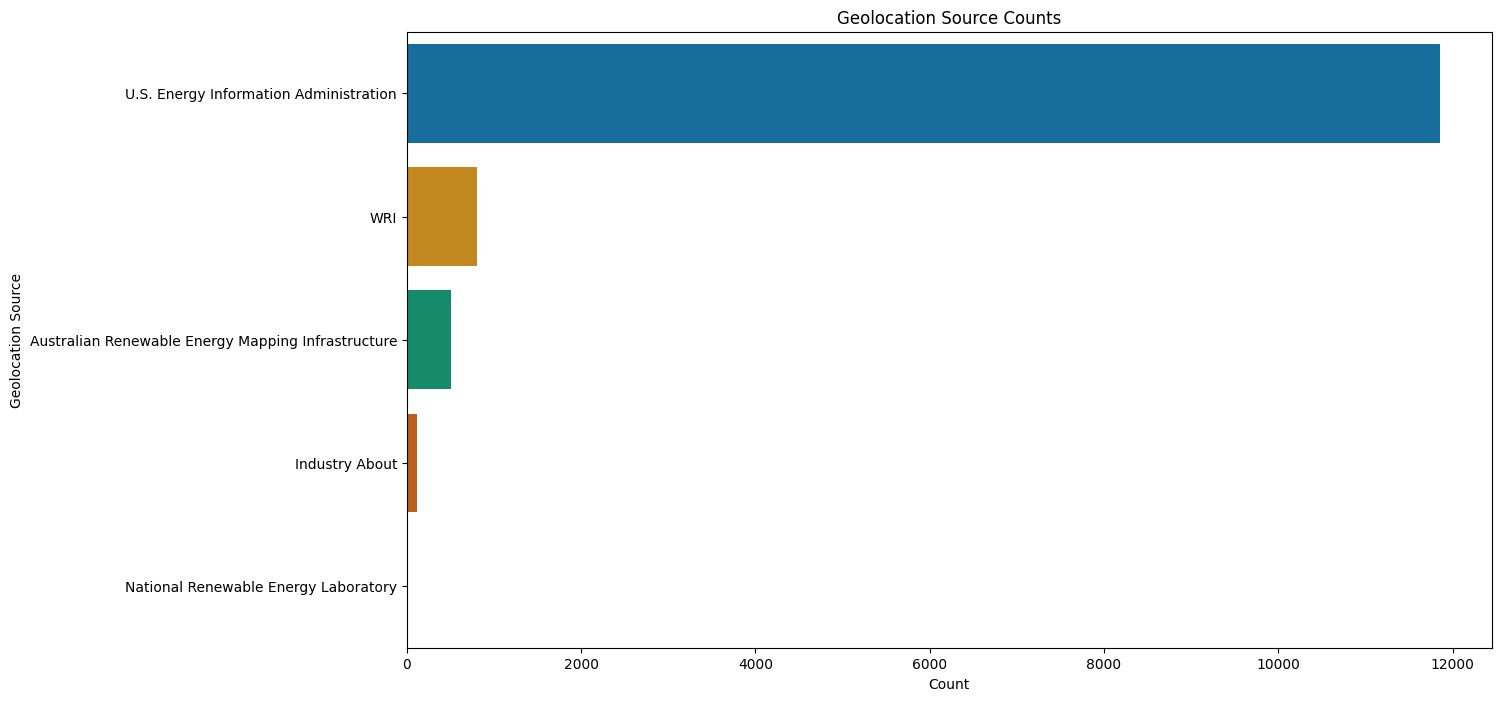

In [30]:
# Geolocation source
plt.figure(figsize=(14, 8))
geolocation_source_counts = df['geolocation_source'].value_counts()
sns.barplot(x=geolocation_source_counts.values, y=geolocation_source_counts.index, palette = 'colorblind')
plt.title('Geolocation Source Counts')
plt.xlabel('Count')
plt.ylabel('Geolocation Source')
plt.show()

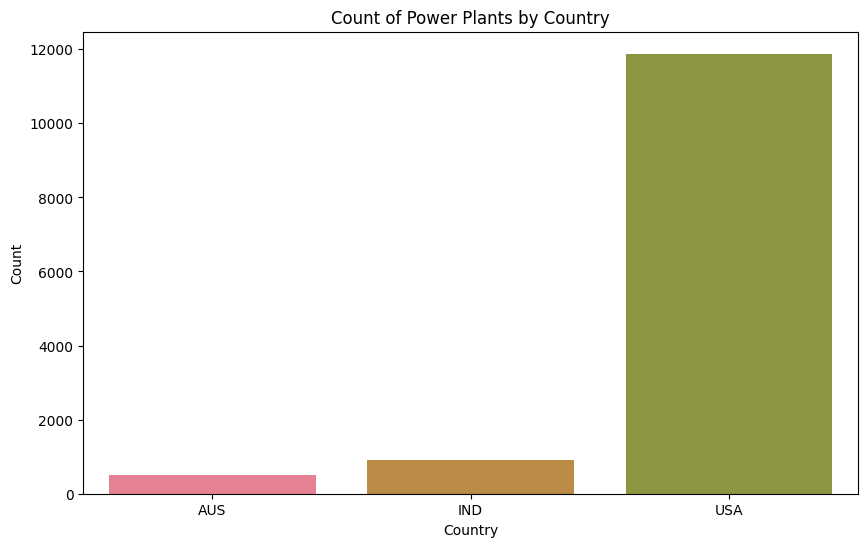

In [31]:
# Countplot for Country column
palette = sns.color_palette("husl", 8)  

# Creating the count plot for 'country'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='country', palette=palette)
plt.title('Count of Power Plants by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## Feature Engineering

#### Label Encoder

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# Identifying categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Applying label encoding
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Displaying the dataframe
print(df)

       country  capacity_mw  latitude  longitude  primary_fuel  \
0            0         0.11  -34.9387   138.5377            10   
1            0         1.00  -34.9453   138.5882            10   
2            0        21.60  -35.0641   117.7977            13   
3            0         0.24  -23.7966   133.8971            10   
4            0         4.00  -34.5509   138.7659             7   
...        ...          ...       ...        ...           ...   
13293        2         3.40   42.8869   -76.9683            13   
13294        2         1.00   44.3195   -92.6703            10   
13295        2         0.00   44.0460   -92.7600            10   
13296        2         0.00   39.7373  -105.0170            10   
13297        2         9.80   40.5606  -112.0478             3   

       commissioning_year  owner  source  geolocation_source  \
0             2011.000000    140      12                   0   
1             1998.184904    141      12                   0   
2             1

Successfully Converted all the categorical columns to numerical columns

In [34]:
# Dropping year of capacity data as it is irrelevant
df.drop('year_of_capacity_data',axis=1,inplace=True)

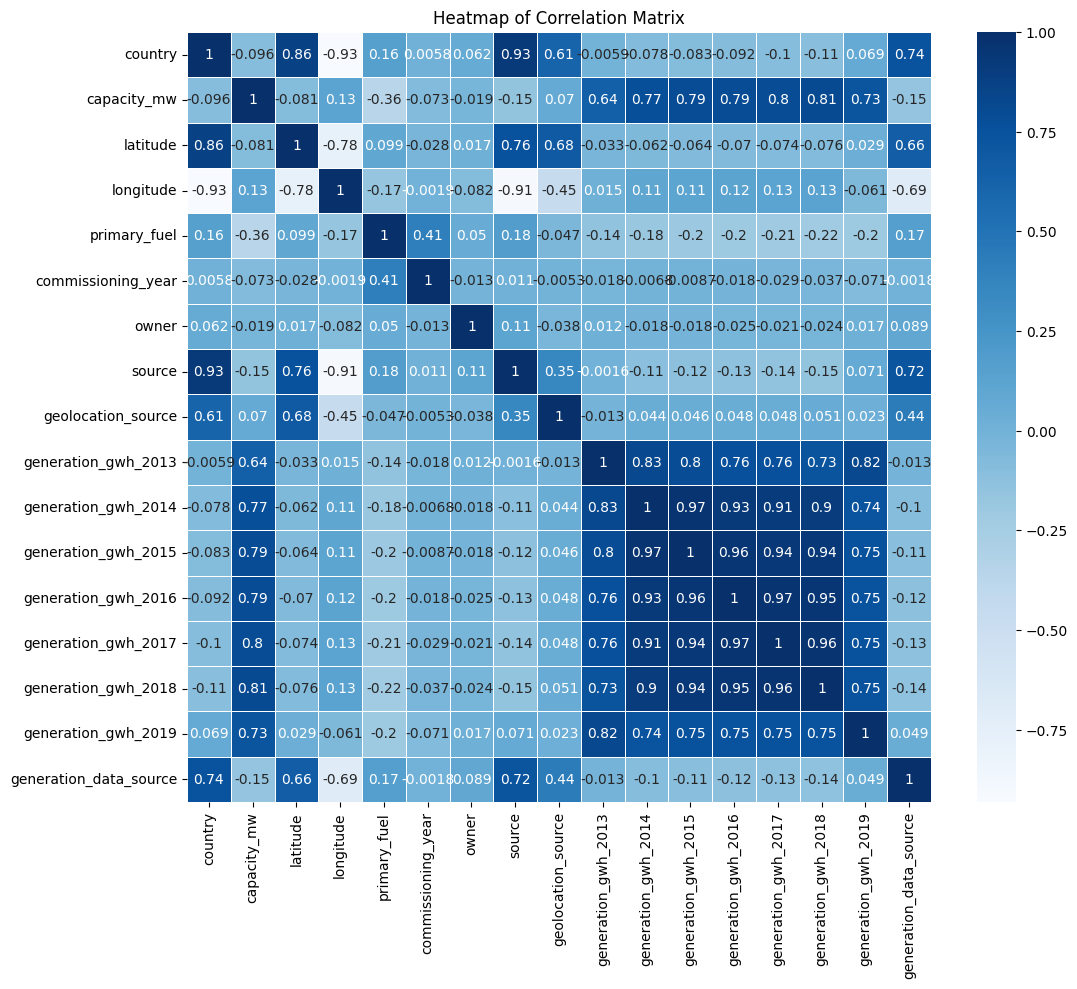

In [35]:
# Computing the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [60]:
df.dropna(subset=['generation_gwh_2019'], inplace=True)

## Target- primary_fuel

In [61]:
x=df.drop('primary_fuel',axis=1)
y=df['primary_fuel']

In [62]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(x)

# Convert the result back to a DataFrame
X = pd.DataFrame(X, columns=x.columns)

# Print the scaled dataframe
print(X.head())

    country  capacity_mw  latitude  longitude  commissioning_year     owner  \
0 -4.136344    -0.338919 -4.545369   3.388202            0.596137 -1.597793   
1 -4.136344    -0.336355 -4.545797   3.389007            0.000020 -1.597195   
2 -4.136344    -0.277004 -4.553512   3.057269            0.000020  1.623853   
3 -4.136344    -0.338544 -3.821792   3.314155            0.270520 -1.560158   
4 -4.136344    -0.327712 -4.520185   3.391843            0.782204 -0.522517   

     source  geolocation_source  generation_gwh_2013  generation_gwh_2014  \
0 -3.209579           -4.422964            -0.000022            -0.000021   
1 -3.209579           -4.422964            -0.000022            -0.000021   
2 -3.209579           -4.422964            -0.317801            -0.322965   
3 -3.209579           -4.422964            -0.000022            -0.000021   
4 -3.209579           -4.422964            -0.000022            -0.000021   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_20

### Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9307, 16)
X_test shape: (3990, 16)
y_train shape: (9307,)
y_test shape: (3990,)


### Model Training and Evaluation

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
# Initializing models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Training and evaluating models
for name, model in models.items():
    print(f"Training model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluating model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print classification report
    print(classification_report(y_test, y_pred))
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

Training model: Logistic Regression
Accuracy: 0.6529
              precision    recall  f1-score   support

           0       0.67      0.13      0.22        77
           1       0.68      0.50      0.58       190
           2       0.00      0.00      0.00        15
           3       0.56      0.55      0.55       599
           4       0.00      0.00      0.00        18
           5       0.59      0.67      0.63       517
           6       0.94      0.62      0.75        24
           7       0.37      0.23      0.28       307
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         5
          10       0.72      0.97      0.83      1594
          11       0.00      0.00      0.00        41
          12       0.33      0.07      0.12       185
          13       0.69      0.43      0.53       409

    accuracy                           0.65      3990
   macro avg       0.40      0.30      0.32      3990
weighted avg       0.61    

### Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

# Initializing RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Defining the grid of parameters to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='accuracy', verbose=1)

grid_search_rf.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy Score for Random Forest:", grid_search_rf.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy Score for Random Forest: 0.841086137878535


In [67]:
# Evaluating Random Forest on test set
rf_best = grid_search_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy on Test Set (Random Forest):", accuracy_rf)
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy on Test Set (Random Forest): 0.8383458646616542
              precision    recall  f1-score   support

           0       0.73      0.25      0.37        77
           1       0.74      0.63      0.68       190
           2       1.00      0.07      0.12        15
           3       0.70      0.75      0.72       599
           4       0.43      0.17      0.24        18
           5       0.82      0.88      0.85       517
           6       0.94      0.62      0.75        24
           7       0.79      0.78      0.79       307
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         5
          10       0.92      0.99      0.95      1594
          11       0.97      0.88      0.92        41
          12       0.68      0.57      0.62       185
          13       0.85      0.80      0.83       409

    accuracy                           0.84      3990
   macro avg       0.68      0.53      0.56      3990
weighted avg       0.83

#### For primary fuel as target best model is random forest as it is giving highest accuracy.

## Target- Capacity_mw

In [68]:
X = df.drop('capacity_mw', axis=1)  
y = df['capacity_mw']               

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (10637, 16)
Shape of X_test: (2660, 16)
Shape of y_train: (10637,)
Shape of y_test: (2660,)


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initializing Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predicting on test set
y_pred_rf = rf.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print("Mean Squared Error:", mse_rf)
print("R^2 Score:", r2_rf)

Random Forest Regressor:
Mean Squared Error: 15148.542345022528
R^2 Score: 0.8523465770067353


In [70]:
from sklearn.ensemble import GradientBoostingRegressor

# Initializing Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# Fit the model
gb.fit(X_train, y_train)

# Predicting on test set
y_pred_gb = gb.predict(X_test)

# Evaluating the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor:")
print("Mean Squared Error:", mse_gb)
print("R^2 Score:", r2_gb)


Gradient Boosting Regressor:
Mean Squared Error: 16306.540764778983
R^2 Score: 0.8410595220146745


#### For capacity_mw as target best model is random forest as it is giving highest accuracy

### Saving Both Models 

In [74]:
import joblib
joblib.dump(rf_model, 'random_forest_primary_fuel.pkl')

['random_forest_primary_fuel.pkl']

In [75]:
joblib.dump(rf, 'random_forest_capacity_mw.pkl')

['random_forest_capacity_mw.pkl']

## Global Power Plant Database Analysis

### Project Overview
The Global Power Plant Database is a comprehensive, open-source repository containing information about power plants worldwide. The dataset covers approximately 14,000 power plants across three countries (USA, AUS, IND) and includes various types of power generation technologies such as thermal (coal, gas, oil, nuclear) and renewables (hydro, wind, solar).

### Data Exploration and Preprocessing

1. Data Loading and Inspection
   - Loaded datasets for USA, Australia (AUS), and India (IND).
   - Verified consistency in column names and types across datasets.

2. Data Cleaning
   - Addressed missing values by dropping columns with more than 70% missing data and imputing remaining missing values appropriately.
   - Converted generation_gwh_2019 from object to float type for numerical analysis.

3. Feature Engineering
   - Used label encoding to convert categorical columns to numerical for modeling purposes.

### Exploratory Data Analysis (EDA)

1. Statistical Summary
   - Reviewed statistical distributions and summary statistics for numerical features like capacity_mw, latitude, longitude, and others.

2. Visualization
   - Utilized various plots (box plots, histograms, count plots) to understand data distributions and relationships.
   - Plotted heatmaps to visualize correlations between numerical features.

### Modeling and Evaluation

1. Target Variable: primary_fuel

   - Applied multiple classification algorithms (Random Forest, Gradient Boosting, etc.) to predict primary_fuel.
   - Assessed model performance using accuracy, precision, recall, and F1-score metrics. Random Forest showed the highest accuracy.

2. Target Variable: capacity_mw

   - Used regression algorithms (Random Forest Regressor, Gradient Boosting Regressor) to predict capacity_mw.
   - Evaluated models based on Mean Squared Error (MSE) and R-squared (R^2) score. Random Forest Regressor demonstrated robust performance.

### Model Optimization

- Hyperparameter Tuning: Conducted grid search to optimize hyperparameters for Random Forest to enhance performance.
- Overfitting/Underfitting: Evaluated models for signs of overfitting or underfitting by comparing train and test set performances.

### Conclusion

- Findings: Random Forest consistently performed well for both classification (primary_fuel) and regression (capacity_mw) tasks.
- Recommendations: Further refinements in handling skewness and outliers removal could potentially improve model accuracy and generalizability.
- Future Work: Explore ensemble techniques,skewness,outliers removal, feature selection methods, and deep learning approaches for more complex and accurate predictions.
